In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sum([5,6,2])

13

In [5]:
string = 'sum'

In [7]:
print(string)

sum


In [9]:
eval(string)

<function sum(iterable, /, start=0)>

In [11]:
funcaoS = eval(string)

In [13]:
funcaoS([5,6,2])

13

In [15]:
mia = cv2.imread('mia.jpg')

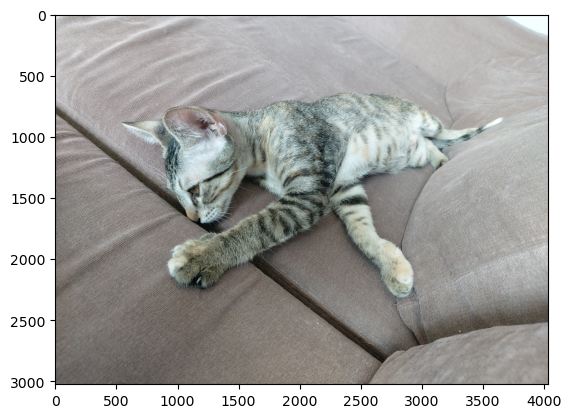

In [17]:
mia = cv2.cvtColor(mia, cv2.COLOR_BGR2RGB)
plt.imshow(mia)
plt.show()

In [19]:
rosto_mia = cv2.imread('rosto_mia.jpg')
rosto_mia = cv2.cvtColor(rosto_mia, cv2.COLOR_BGR2RGB)

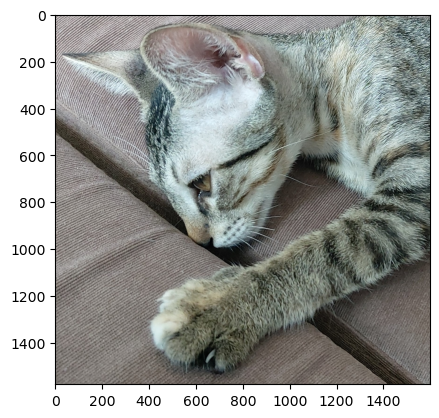

In [21]:
plt.imshow(rosto_mia)
plt.show()

In [23]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 
          'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [25]:
mia.shape

(3024, 4032, 3)

In [27]:
rosto_mia.shape

(1577, 1598, 3)

In [29]:
meu_metodo = eval('cv2.TM_SQDIFF')
res = cv2.matchTemplate(mia, rosto_mia, meu_metodo)

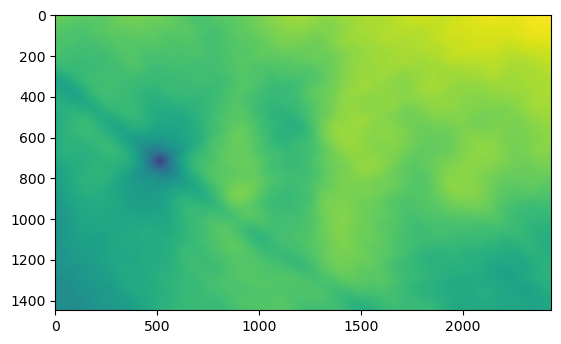

In [31]:
plt.imshow(res)
plt.show()

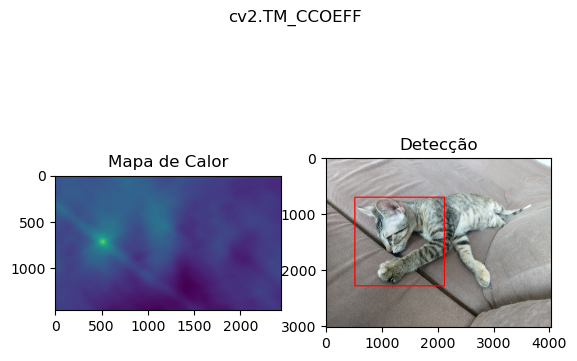

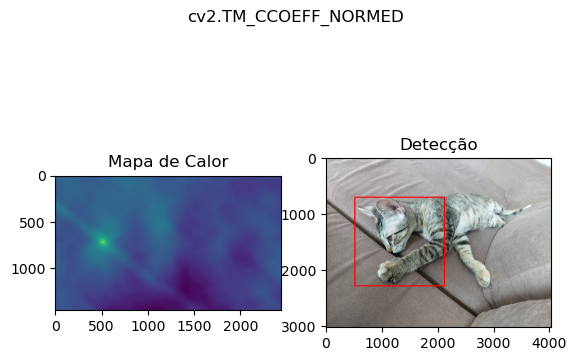

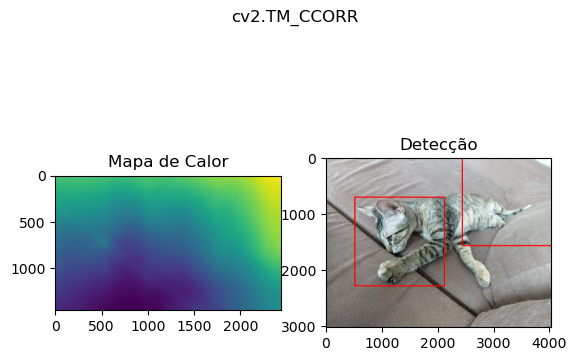

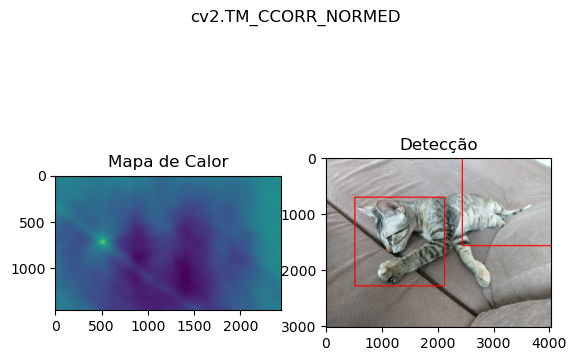

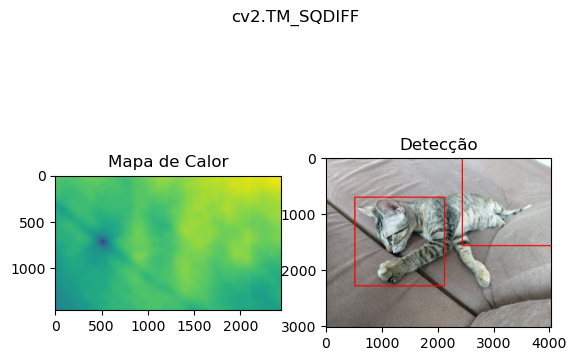

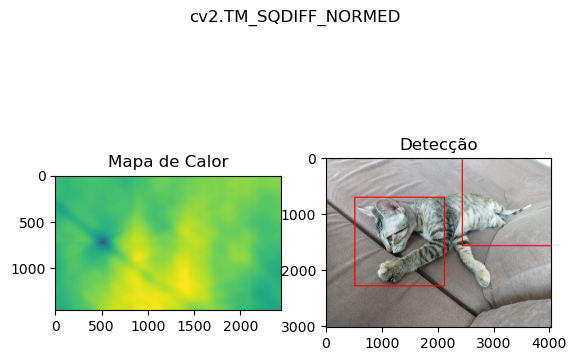

In [33]:
for m in methods:
    
    #criar uma copia da imagem
    copia_mia = mia.copy()
    
    method = eval(m)
    
    #Template Matching
    res = cv2.matchTemplate(copia_mia, rosto_mia, method)
    
    #Pegar os valores minimos e maximos, assim como as localizações minimas e máximas
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_esquerdo = min_loc #(x,y)
        
    else:
        top_esquerdo = max_loc
        
    #Definir a forma do retângulo
    altura, largura, canais = rosto_mia.shape
    
    base_direita = (top_esquerdo[0] + largura, top_esquerdo[1] + altura)
    
    cv2.rectangle(mia, top_esquerdo, base_direita, (255,0,0), 20)
    
    #Apresentar as imagens
    plt.subplot(121)
    plt.imshow(res)
    plt.title("Mapa de Calor")
    
    plt.subplot(122)
    plt.imshow(mia)
    plt.title("Detecção")
    
    #Nome do Método
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')